In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense,Input
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import time
import keras

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [ ]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
params=[]
timess=[]
test_acc=[]
train_acc=[]

# Different number of filters

In [ ]:
filters = [4, 32, 128, 512, 2056]

In [ ]:
for i in filters:
    model= Sequential()
    model.add(Input(shape=(28,28,1)))
    model.add(Conv2D(i,(3,3),activation='relu'))
    model.add(Flatten())
    model.add(Dense(10,activation='softmax'))
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    t=time.time()
    model.fit(X_train,y_train,epochs=5)
    timess.append(time.time()-t)
    b=model.evaluate(X_train,y_train)
    a=model.evaluate(X_test,y_test)
    
    train_acc.append(b[1])
    test_acc.append(a[1])
    params.append(model.count_params())

Epoch 1/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3187 - accuracy: 0.9111
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1666 - accuracy: 0.9527
Epoch 3/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1157 - accuracy: 0.9674
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0909 - accuracy: 0.9736
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.0901 - accuracy: 0.9723
Epoch 1/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1742 - accuracy: 0.9489
Epoch 2/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0667 - accuracy: 0.9799
Epoch 3/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0486 - accuracy: 0.9849
Epoch 4/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0359 - accuracy: 0.9888
Epoch 5/5
313/313 [==============================] - 2s 6ms/step - loss: 0.0595 -

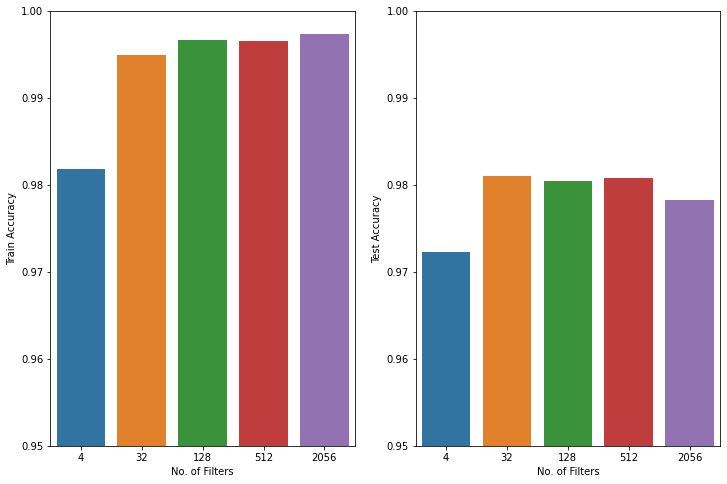

In [ ]:
fig,axes= plt.subplots(1,2,figsize=(12,8))

axes[0].set_ylabel('Train Accuracy')
axes[1].set_ylabel('Test Accuracy')
axes[0].set_xlabel('No. of Filters')
axes[1].set_xlabel('No. of Filters')

axes[0].set_ylim(0.95,1.0)
axes[1].set_ylim(0.95,1.0)

sns.barplot(x=filters,y=train_acc,ax=axes[0])
sns.barplot(x=filters,y=test_acc,ax=axes[1])

In [ ]:
## Different number of layers (32 3x3 filters)

In [ ]:
params2=[]
timess2=[]
test_acc2=[]
train_acc2=[]

In [ ]:
layers=[2,3,4]

In [ ]:
for i in layers:
    model= Sequential()
    model.add(Input(shape=(28,28,1)))
    for j in range(i):
      model.add(Conv2D(32,(3,3),activation='relu'))
    model.add(Flatten())
    model.add(Dense(10,activation='softmax'))
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    t=time.time()
    model.fit(X_train,y_train,epochs=5)
    timess2.append(time.time()-t)
    b=model.evaluate(X_train,y_train)
    a=model.evaluate(X_test,y_test)
    
    train_acc2.append(b[1])
    test_acc2.append(a[1])
    params2.append(model.count_params())

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1350 - accuracy: 0.9591
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0481 - accuracy: 0.9853
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0318 - accuracy: 0.9904
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0215 - accuracy: 0.9931
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0548 - accuracy: 0.9842
Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1221 - accuracy: 0.9635
Epoch 2/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0442 - accuracy: 0.9862
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0292 - accuracy: 0.9908
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0207 - accuracy: 0.9934
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0412 - accuracy: 0

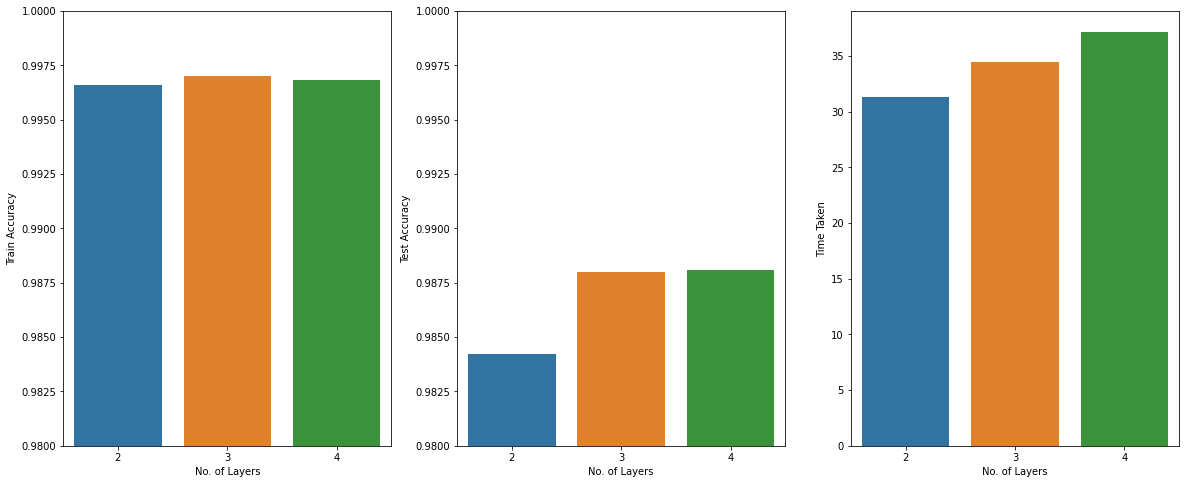

In [ ]:
fig,axes= plt.subplots(1,3,figsize=(20,8))

axes[0].set_ylabel('Train Accuracy')
axes[1].set_ylabel('Test Accuracy')
axes[2].set_ylabel('Time Taken')
axes[0].set_xlabel('No. of Layers')
axes[1].set_xlabel('No. of Layers')
axes[2].set_xlabel('No. of Layers')

axes[0].set_ylim(0.98,1.0)
axes[1].set_ylim(0.98,1.0)

sns.barplot(x=layers,y=train_acc2,ax=axes[0])
sns.barplot(x=layers,y=test_acc2,ax=axes[1])
sns.barplot(x=layers,y=timess2,ax=axes[2])

## Different Filter Size

In [ ]:
params3=[]
timess3=[]
test_acc3=[]
train_acc3=[]
filt=[]

In [ ]:
filter_size=[3,5,7]

In [ ]:
for i in filter_size:
    model= Sequential()
    model.add(Input(shape=(28,28,1)))
    model.add(Conv2D(16,(i,i),activation='relu'))
    model.add(Conv2D(16,(i,i),activation='relu'))
    model.add(Flatten())
    model.add(Dense(10,activation='softmax'))
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    t=time.time()
    model.fit(X_train,y_train,epochs=5)
    timess3.append(time.time()-t)
    b=model.evaluate(X_train,y_train)
    a=model.evaluate(X_test,y_test)
    
    filt.append(i)
    train_acc3.append(b[1])
    test_acc3.append(a[1])
    params3.append(model.count_params())

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1440 - accuracy: 0.9581
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0533 - accuracy: 0.9836
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0367 - accuracy: 0.9888
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0265 - accuracy: 0.9917
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0582 - accuracy: 0.9828
Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1366 - accuracy: 0.9596
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0510 - accuracy: 0.9853
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0360 - accuracy: 0.9890
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0270 - accuracy: 0.9915
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0370 - accuracy: 0

In [ ]:
filt

[3, 5, 7]

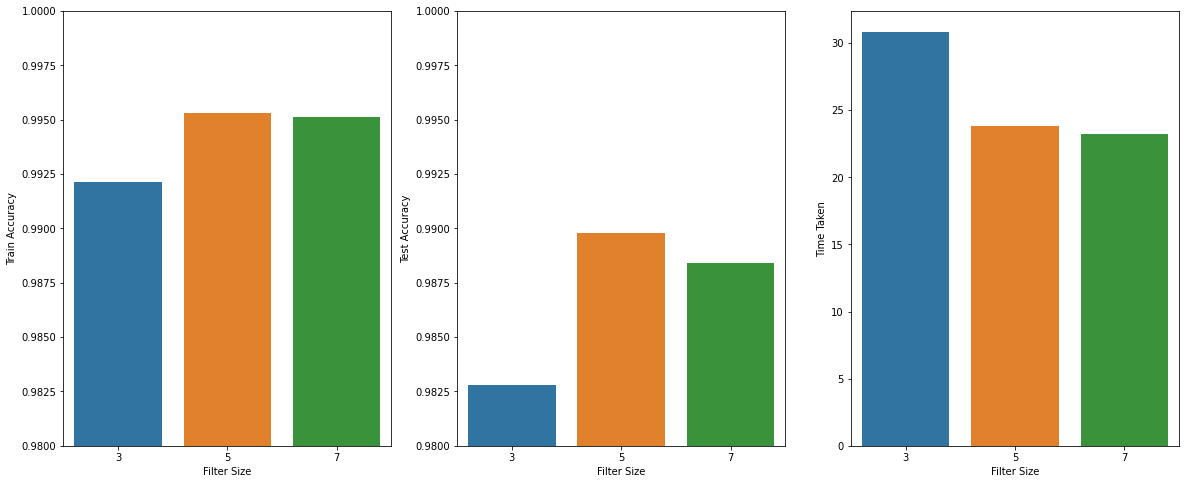

In [ ]:
fig,axes= plt.subplots(1,3,figsize=(20,8))

axes[0].set_ylabel('Train Accuracy')
axes[1].set_ylabel('Test Accuracy')
axes[2].set_ylabel('Time Taken')
axes[0].set_xlabel('Filter Size')
axes[1].set_xlabel('Filter Size')
axes[2].set_xlabel('Filter Size')

axes[0].set_ylim(0.98,1.0)
axes[1].set_ylim(0.98,1.0)

sns.barplot(x=filt,y=train_acc3,ax=axes[0])
sns.barplot(x=filt,y=test_acc3,ax=axes[1])
sns.barplot(x=filt,y=timess3,ax=axes[2])

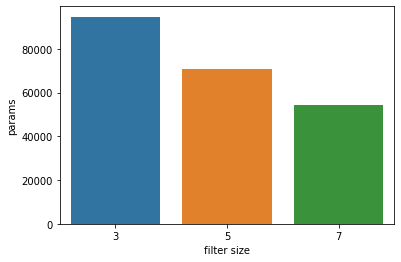

In [ ]:
plt.xlabel('filter size')
plt.ylabel('params')
sns.barplot(filt,params3)

In [ ]:
## Different Activation Functions

In [ ]:
activ=['sigmoid','tanh','relu']

In [ ]:
params4=[]
timess4=[]
test_acc4=[]
train_acc4=[]

In [ ]:
activa=[]

In [ ]:
for i in activ:
    model= Sequential()
    model.add(Input(shape=(28,28,1)))
    model.add(Conv2D(16,(3,3),activation=i))
    model.add(Conv2D(16,(3,3),activation=i))
    model.add(Flatten())
    model.add(Dense(10,activation='softmax'))
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    t=time.time()
    model.fit(X_train,y_train,epochs=5)
    timess4.append(time.time()-t)
    b=model.evaluate(X_train,y_train)
    a=model.evaluate(X_test,y_test)
    

    train_acc4.append(b[1])
    test_acc4.append(a[1])
    params4.append(model.count_params())

    activa.append(i)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6627 - accuracy: 0.7885
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2572 - accuracy: 0.9231
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1585 - accuracy: 0.9533
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1194 - accuracy: 0.9649
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0824 - accuracy: 0.9756
Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3381 - accuracy: 0.9024
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1777 - accuracy: 0.9493
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1017 - accuracy: 0.9701
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0827 - accuracy: 0.9745
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0898 - accuracy: 0

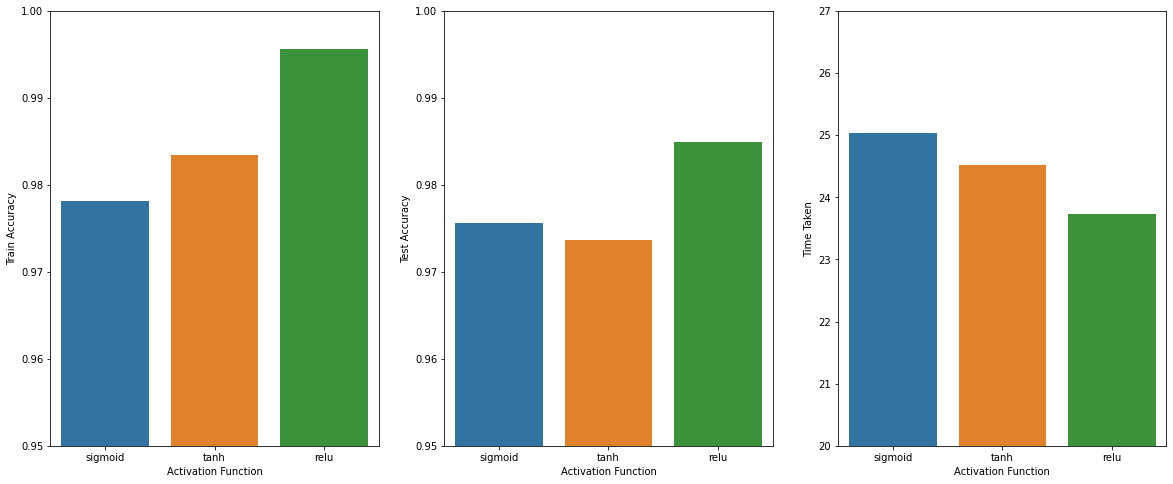

In [ ]:
fig,axes= plt.subplots(1,3,figsize=(20,8))

axes[0].set_ylabel('Train Accuracy')
axes[1].set_ylabel('Test Accuracy')
axes[2].set_ylabel('Time Taken')
axes[0].set_xlabel('Activation Function')
axes[1].set_xlabel('Activation Function')
axes[2].set_xlabel('Activation Function')

axes[0].set_ylim(0.95,1.0)
axes[1].set_ylim(0.95,1.0)
axes[2].set_ylim(20,27)

sns.barplot(x=activa,y=train_acc4,ax=axes[0])
sns.barplot(x=activa,y=test_acc4,ax=axes[1])
sns.barplot(x=activa,y=timess4,ax=axes[2])

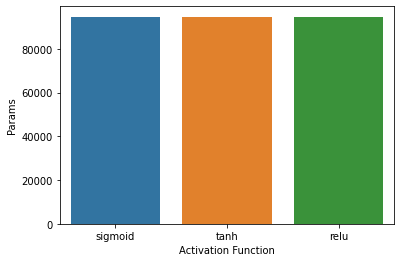

In [ ]:
plt.xlabel('Activation Function')
plt.ylabel('Params')
sns.barplot(activa,params4)

In [ ]:
## 10 epochs

In [ ]:
params5=[]
timess5=[]
test_acc5=[]
train_acc5=[]

In [ ]:
activa2=[]

In [ ]:
for i in activ:
    model= Sequential()
    model.add(Input(shape=(28,28,1)))
    model.add(Conv2D(16,(3,3),activation=i))
    model.add(Conv2D(16,(3,3),activation=i))
    model.add(Flatten())
    model.add(Dense(10,activation='softmax'))
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    t=time.time()
    model.fit(X_train,y_train,epochs=10)
    timess5.append(time.time()-t)
    b=model.evaluate(X_train,y_train)
    a=model.evaluate(X_test,y_test)
    

    train_acc5.append(b[1])
    test_acc5.append(a[1])
    params5.append(model.count_params())

    activa2.append(i)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6640 - accuracy: 0.7844
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3106 - accuracy: 0.9070
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2337 - accuracy: 0.9310
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1390 - accuracy: 0.9586
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0942 - accuracy: 0.9718
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0769 - accuracy: 0.9767
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0654 - accuracy: 0.9797
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0573 - accuracy: 0.9828
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0512 - accuracy: 0.9841
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0596 

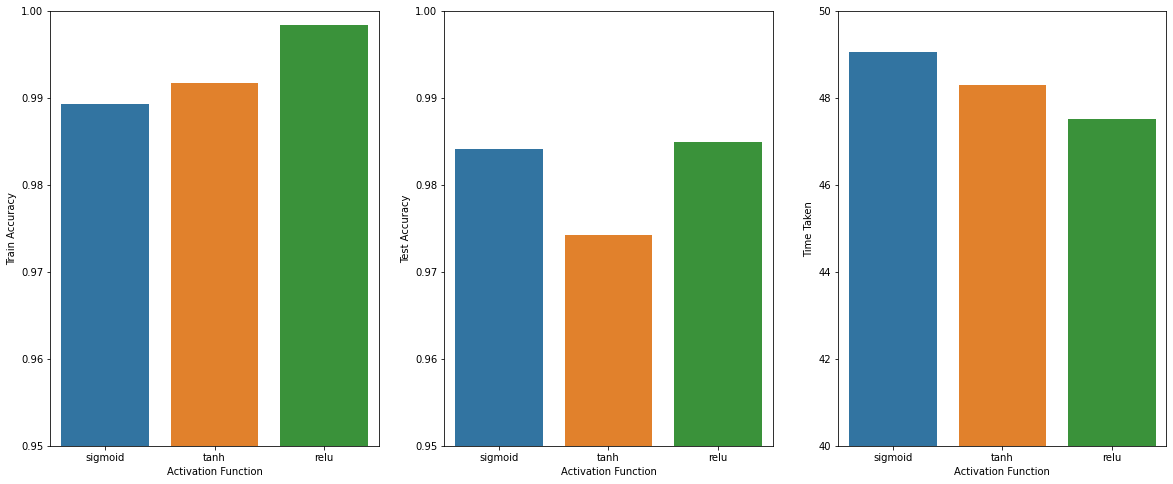

In [ ]:
fig,axes= plt.subplots(1,3,figsize=(20,8))

axes[0].set_ylabel('Train Accuracy')
axes[1].set_ylabel('Test Accuracy')
axes[2].set_ylabel('Time Taken')
axes[0].set_xlabel('Activation Function')
axes[1].set_xlabel('Activation Function')
axes[2].set_xlabel('Activation Function')

axes[0].set_ylim(0.95,1.0)
axes[1].set_ylim(0.95,1.0)
axes[2].set_ylim(40,50)

sns.barplot(x=activa2,y=train_acc5,ax=axes[0])
sns.barplot(x=activa2,y=test_acc5,ax=axes[1])
sns.barplot(x=activa2,y=timess5,ax=axes[2])

In [ ]:
# For diff combos

In [ ]:
combos=[[3,5],[5,7],[7,3]]

In [ ]:
comb=[]

In [ ]:
params6=[]
timess6=[]
test_acc6=[]
train_acc6=[]

In [ ]:
for i in combos:
    model= Sequential()
    model.add(Input(shape=(28,28,1)))
    model.add(Conv2D(16,(i[0],i[0]),activation='relu'))
    model.add(Conv2D(16,(i[1],i[1]),activation='relu'))
    model.add(Flatten())
    model.add(Dense(10,activation='softmax'))
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    t=time.time()
    model.fit(X_train,y_train,epochs=5)
    timess6.append(time.time()-t)
    b=model.evaluate(X_train,y_train)
    a=model.evaluate(X_test,y_test)
    

    train_acc6.append(b[1])
    test_acc6.append(a[1])
    params6.append(model.count_params())

    comb.append(i)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1376 - accuracy: 0.9591
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0479 - accuracy: 0.9859
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0344 - accuracy: 0.9889
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0240 - accuracy: 0.9922
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0470 - accuracy: 0.9869
Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1318 - accuracy: 0.9606
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0472 - accuracy: 0.9857
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0334 - accuracy: 0.9892
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0258 - accuracy: 0.9916
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0367 - accuracy: 0

In [ ]:
comb

[[3, 5], [5, 7], [7, 3]]

In [ ]:
combb=["3->5","5->7","7->3"]

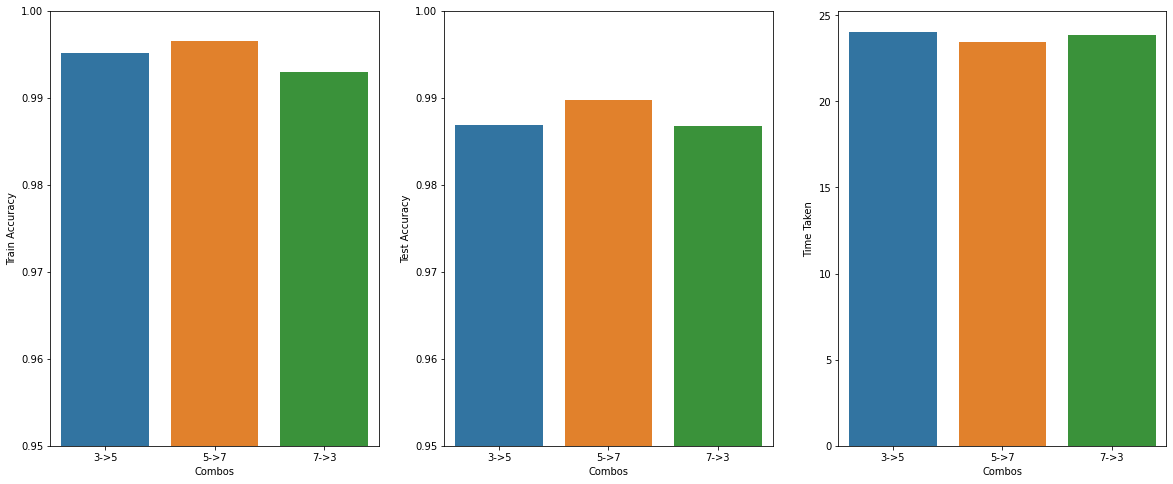

In [ ]:
fig,axes= plt.subplots(1,3,figsize=(20,8))

axes[0].set_ylabel('Train Accuracy')
axes[1].set_ylabel('Test Accuracy')
axes[2].set_ylabel('Time Taken')
axes[0].set_xlabel('Combos')
axes[1].set_xlabel('Combos')
axes[2].set_xlabel('Combos')

axes[0].set_ylim(0.95,1.0)
axes[1].set_ylim(0.95,1.0)
# axes[2].set_ylim(40,50)

sns.barplot(x=combb,y=train_acc6,ax=axes[0])
sns.barplot(x=combb,y=test_acc6,ax=axes[1])
sns.barplot(x=combb,y=timess6,ax=axes[2])

In [ ]:
comb

[[3, 5], [5, 7], [7, 3]]